In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Jacob Kai/Documents/Python_Practice/Raw Data/survey_2022/survey_results_public_2022.csv')

In [3]:
grp_country_taiwan = df.groupby('Country').get_group('Taiwan')
grp_country_vietnam = df.groupby('Country').get_group('Viet Nam')

In [4]:
grp_country_taiwan['YearsCode'].unique()

array(['8', '4', '5', '7', '14', '10', '6', '13', '17', '9', '12', '2',
       '11', '18', '3', '15', '22', '1', nan, '20', 'Less than 1 year',
       '25', '16', '29', '33', '23', '34', '19'], dtype=object)

In [5]:
grp_country_vietnam['YearsCode'].unique()

array(['4', '8', '5', '15', '3', '14', '2', '1', '17', '7', '13', '12',
       '9', 'Less than 1 year', '6', nan, 'More than 50 years', '11',
       '20', '26', '27', '33', '30', '10', '18', '35', '31', '16'],
      dtype=object)

In [6]:
grp_country_taiwan['YearsCode'].replace('Less than 1 year', 0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [7]:
grp_country_taiwan['YearsCode'].unique()

array(['8', '4', '5', '7', '14', '10', '6', '13', '17', '9', '12', '2',
       '11', '18', '3', '15', '22', '1', nan, '20', 0, '25', '16', '29',
       '33', '23', '34', '19'], dtype=object)

In [8]:
grp_yearscode_taiwan = grp_country_taiwan['YearsCode'].astype(float)

In [9]:
grp_yearscode_taiwan.unique()

array([ 8.,  4.,  5.,  7., 14., 10.,  6., 13., 17.,  9., 12.,  2., 11.,
       18.,  3., 15., 22.,  1., nan, 20.,  0., 25., 16., 29., 33., 23.,
       34., 19.])

In [10]:
grp_country_vietnam['YearsCode'].replace('Less than 1 year', 0, inplace=True)
grp_country_vietnam['YearsCode'].replace('More than 50 years', 51, inplace=True)

In [11]:
grp_country_vietnam['YearsCode'].unique()

array(['4', '8', '5', '15', '3', '14', '2', '1', '17', '7', '13', '12',
       '9', 0, '6', nan, 51, '11', '20', '26', '27', '33', '30', '10',
       '18', '35', '31', '16'], dtype=object)

In [12]:
grp_yearscode_vietnam = grp_country_vietnam['YearsCode'].astype(float)

In [13]:
final_tw_yc = grp_yearscode_taiwan.value_counts().sort_index(ascending=True).reindex(np.arange(51+1), fill_value=0)
final_vn_yc = grp_yearscode_vietnam.value_counts().sort_index(ascending=True).reindex(np.arange(51+1), fill_value=0)

<function matplotlib.pyplot.show(close=None, block=None)>

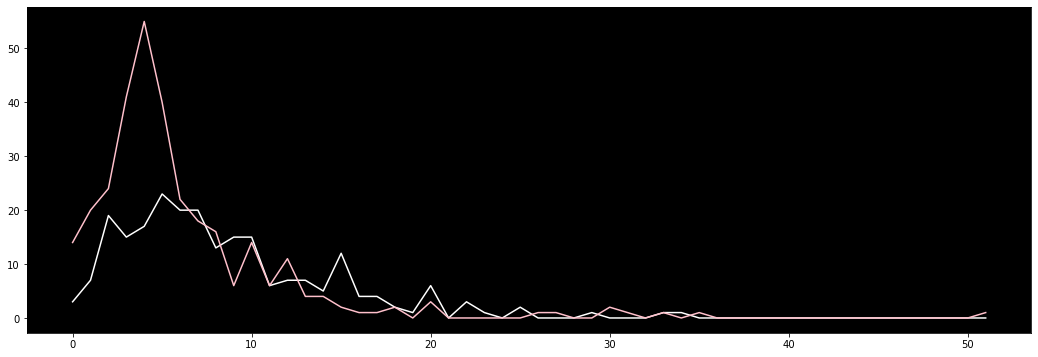

In [19]:
a = np.arange(51+1)

plt.figure(figsize=(18, 6))
plt.axes().set_facecolor('black')

plt.plot(a, final_tw_yc, color='white')
plt.plot(a, final_vn_yc, color='pink')

plt.show

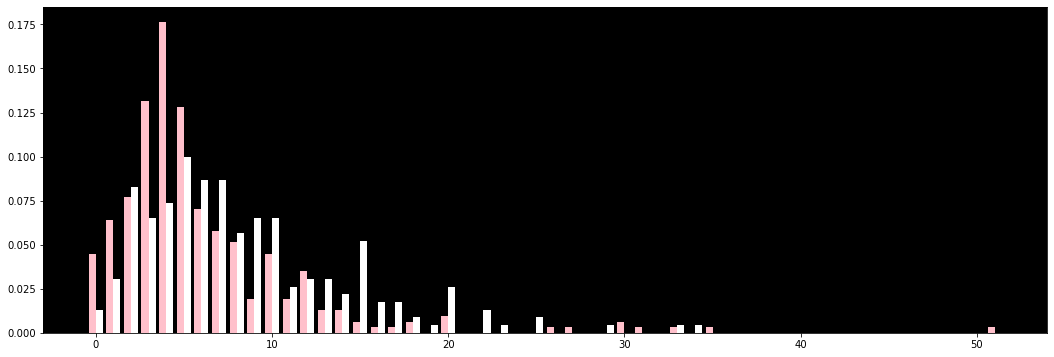

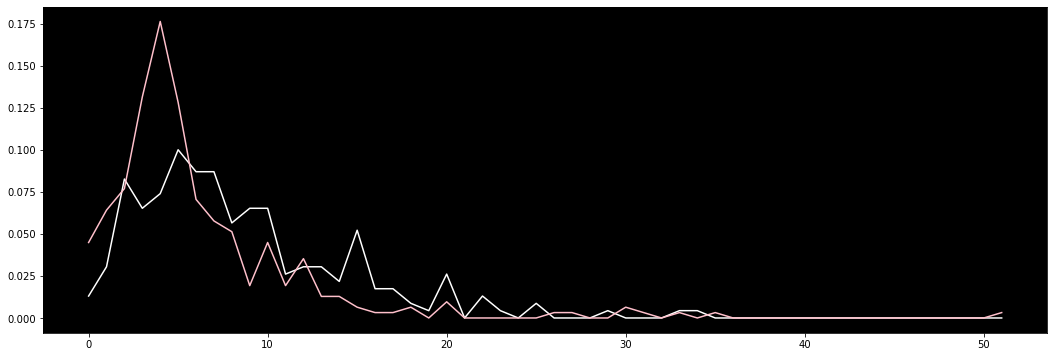

In [18]:
final_tw_yc_pt = grp_yearscode_taiwan.value_counts(normalize=1).sort_index(ascending=True).reindex(np.arange(51+1), fill_value=0)
final_vn_yc_pt = grp_yearscode_vietnam.value_counts(normalize=1).sort_index(ascending=True).reindex(np.arange(51+1), fill_value=0)


a = np.arange(51+1)

plt.figure(figsize=(18, 6))
plt.axes().set_facecolor('black')

width=0.4
plt.bar(a + width / 2, final_tw_yc_pt, color='white', width=width)
plt.bar(a - width / 2, final_vn_yc_pt, color='pink', width=width)


plt.figure(figsize=(18, 6))
plt.axes().set_facecolor('black')

plt.plot(a, final_tw_yc_pt, color='white')
plt.plot(a, final_vn_yc_pt, color='pink')

plt.show()